In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

import warnings
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")

Import the data

In [3]:
data= pd.read_csv('/content/gld_price_data.csv')

In [4]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Data Analysis

In [7]:
data.shape

(2290, 6)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
#Detect missing values
data.isna().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [10]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [11]:
#check if there are duplicate or not
data.duplicated().sum()

0

In [12]:
#returns the number of unique values for each column.
data.nunique()

Date       2290
SPX        2277
GLD        1930
USO        1514
SLV        1331
EUR/USD    2066
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f804f1e5df0>,
      dtype=object)

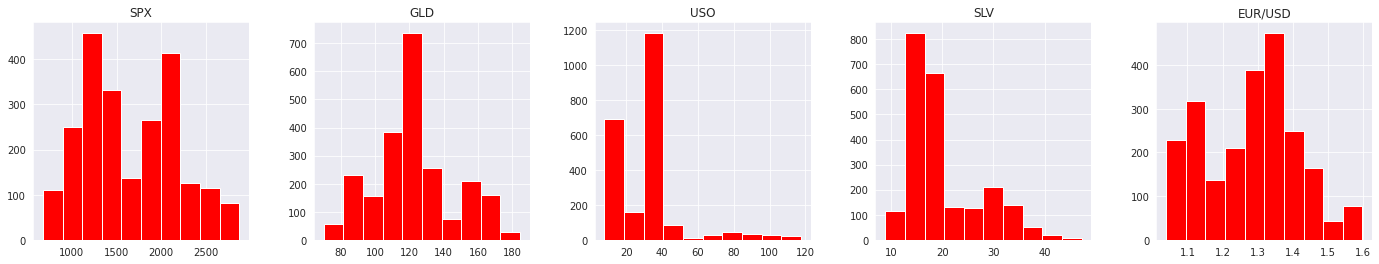

In [13]:
#presenting inthe histogram
data.hist(figsize=(24,4),layout=(1,5),color='red')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f804ef5ebb0>],
      dtype=object)

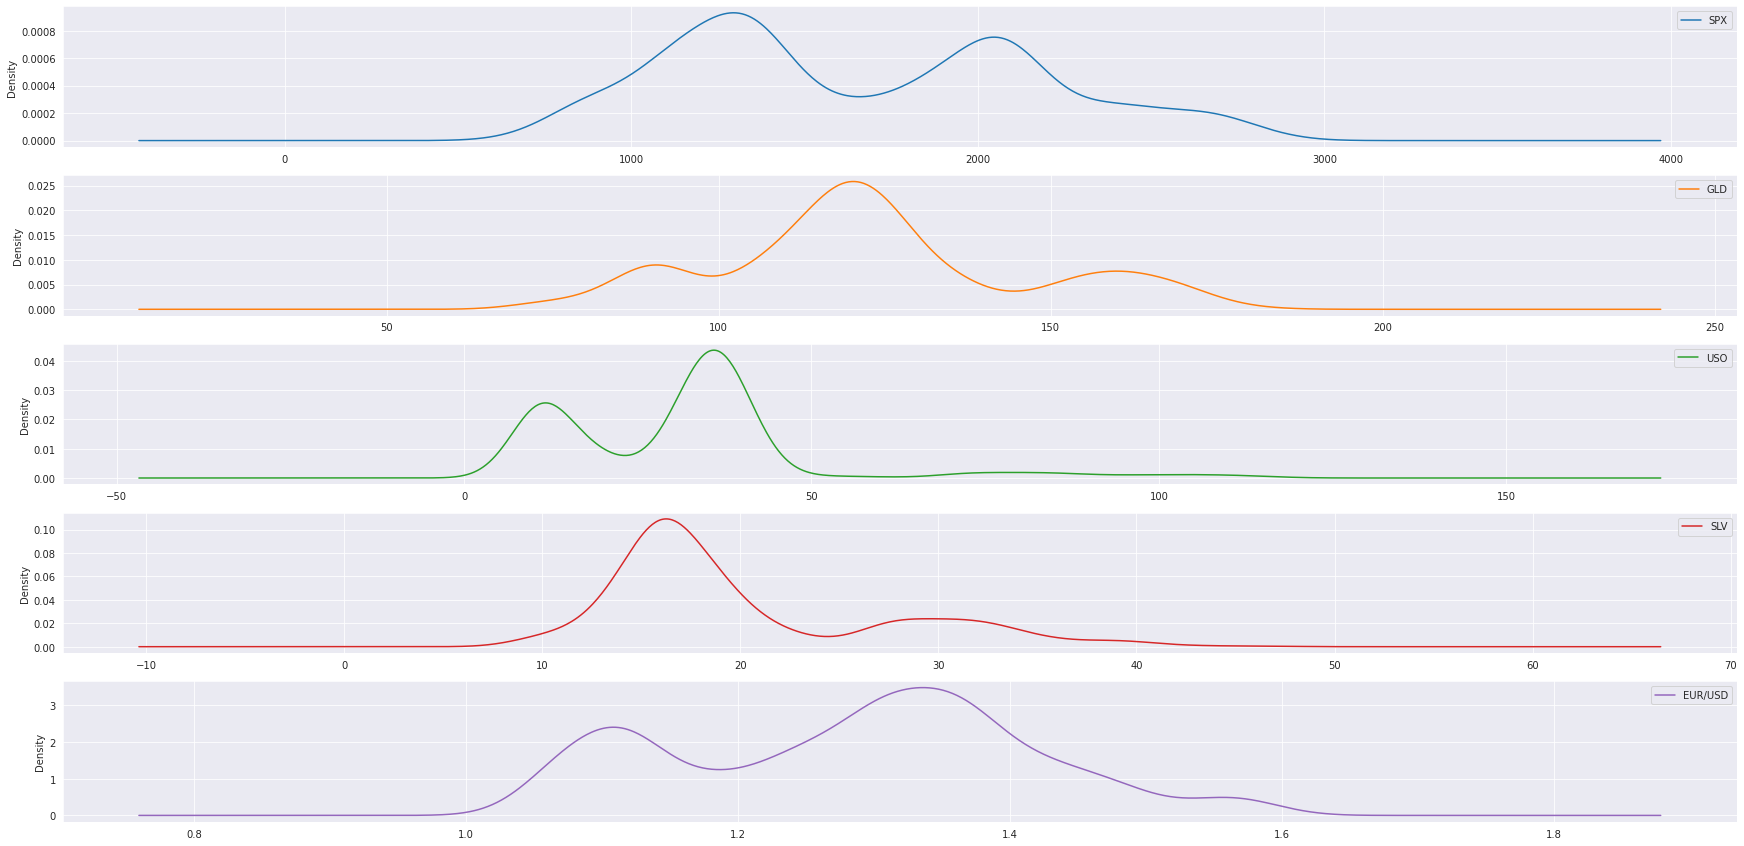

In [14]:
#plotting the data KDE represents the data using a continuous probability density curve in one or more dimensions.
data.plot(kind="kde",subplots=True,layout=(5,1),figsize=(30,15),sharex=False,sharey=False)

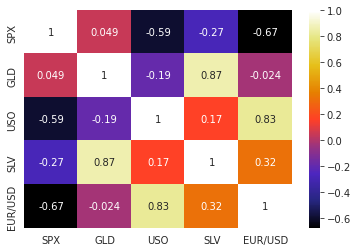

In [15]:
#annot represent the value of each box
plt.figure()
sns.heatmap(data.corr(),annot=True,cmap=plt.cm.CMRmap)

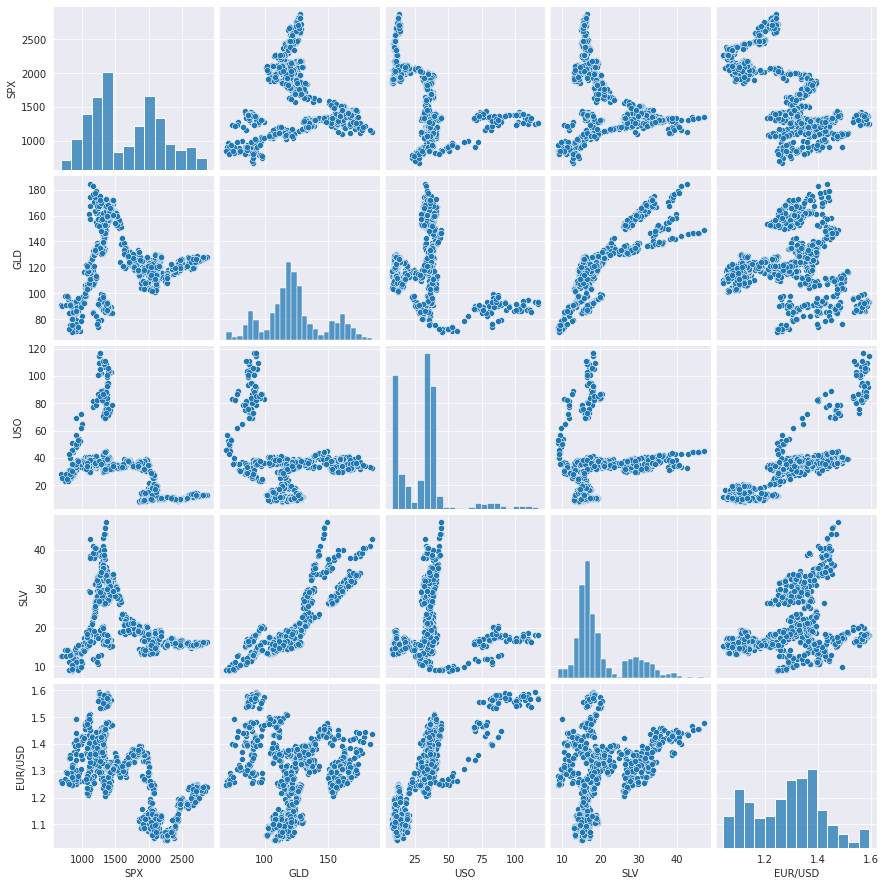

In [16]:
#collected sample of 1000   we can do of may be 100 or  others
sns.pairplot(data.sample(n=1000))

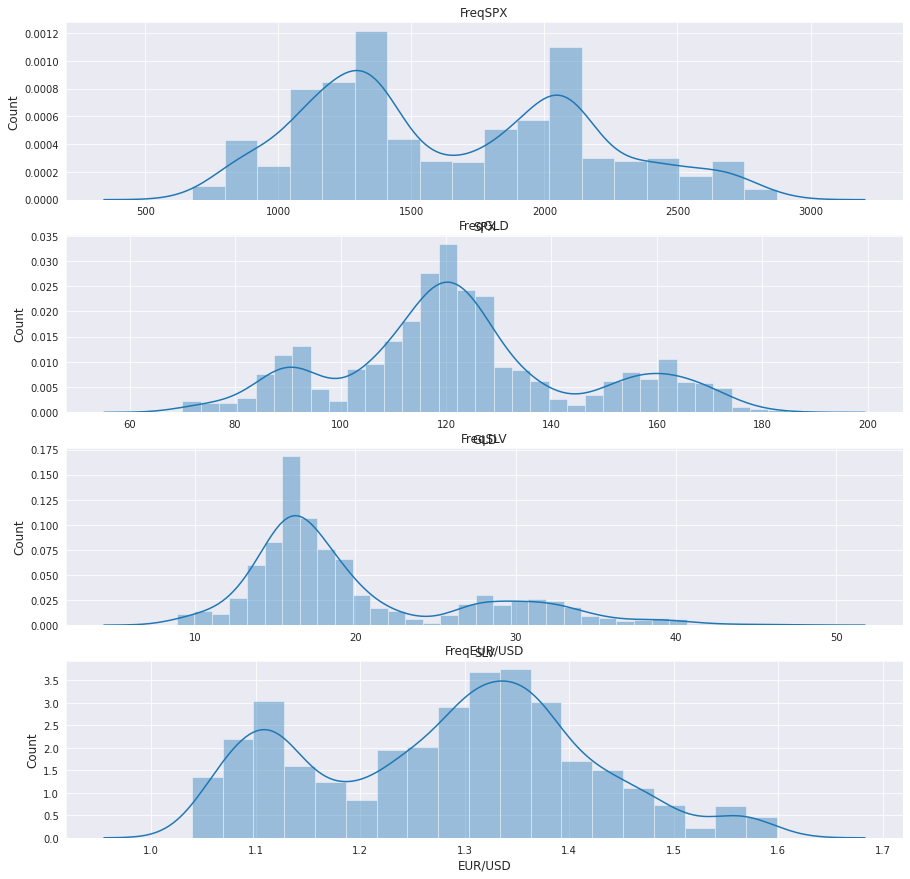

In [17]:
from ctypes import alignment
col_names=['SPX','GLD','SLV','EUR/USD']
fig , ax =  plt.subplots(len(col_names),figsize=(15,15))
for i , col_val in enumerate(col_names):

  sns.distplot(data[col_val],hist=True,ax=ax[i])
  ax[i].set_title('Freq'+ col_val,fontsize=12)
  ax[i].set_xlabel(col_val,fontsize=12)
  ax[i].set_ylabel("Count",fontsize=12)

  


plt.show()

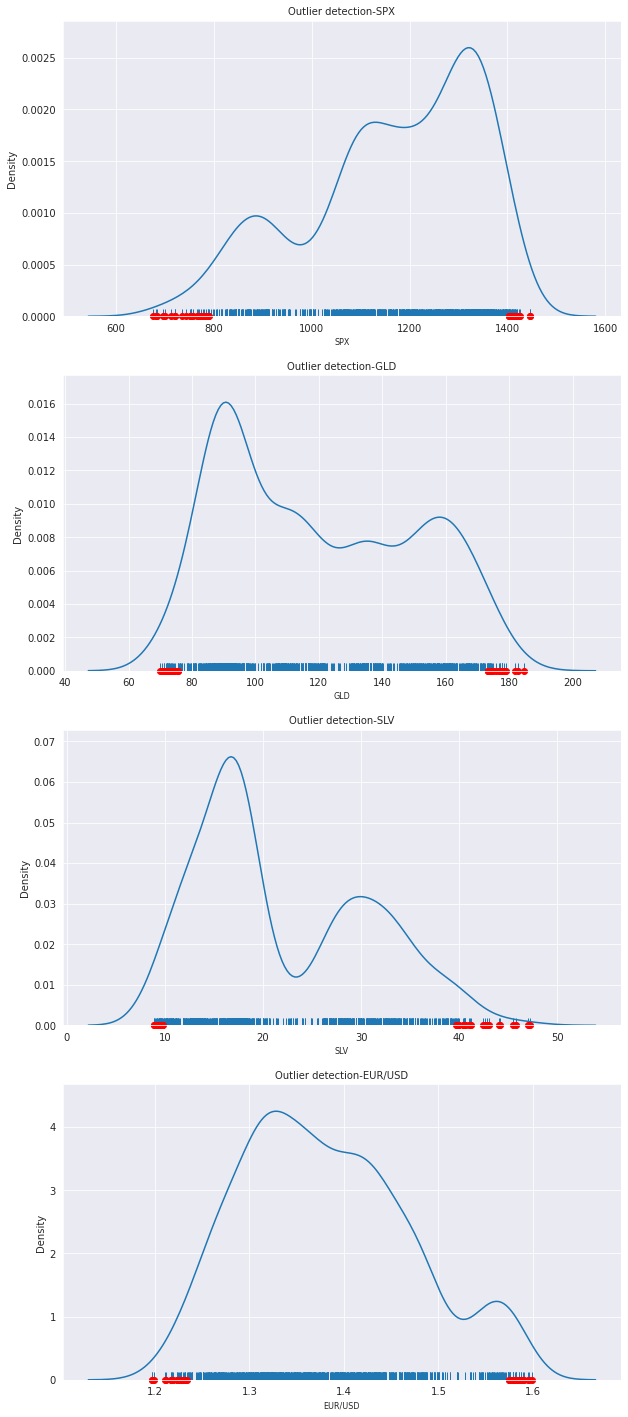

In [18]:
def percentile_based_outlier(data,threshold=95):
  diff=(100- threshold)/2
  minval , maxval = np.percentile(data,[diff,100-diff])
  return(data<minval)| (data>maxval)

col_names=['SPX','GLD','SLV','EUR/USD']
fig,ax = plt.subplots(len(col_names),figsize=(10,25))

for i , col_val in enumerate(col_names):
  x= data[col_val][:1000]
  sns.distplot(x,ax=ax[i],rug= True, hist = False)
  outliers = x[percentile_based_outlier(x)]
  ax[i].plot(outliers,np.zeros_like(outliers),'ro',clip_on=False)



  ax[i].set_title("Outlier detection-{}".format(col_val),fontsize=10)
  ax[i].set_xlabel(col_val,fontsize=8)

plt.show()

## **Pre- processing **

In [19]:
data_preprocessed = data.copy()


In [20]:
data_preprocessed.isnull().mean()*100

Date       0.0
SPX        0.0
GLD        0.0
USO        0.0
SLV        0.0
EUR/USD    0.0
dtype: float64

In [21]:
data_columns = ['Date']
num_columns= data_preprocessed.select_dtypes(include=['float64','int64']).columns
target_col = 'GLD'

In [22]:
num_columns

Index(['SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [23]:
data_preprocessed.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [24]:

data_preprocessed['Date']=pd.to_datetime(data_preprocessed['Date'])

In [25]:
data_preprocessed.reset_index(drop=True, inplace=True)

In [26]:
data_preprocessed.drop(['Date'], axis=1, inplace=True)


data train test splitting

In [27]:
X = data.drop(['Date','GLD'],axis=1)
Y= data['GLD']

X_train, X_test,y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [28]:
#feature scalling

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

feature selection

In [29]:
from sklearn.feature_selection import SelectKBest

fs = SelectKBest(k=3)
X_train_scaled = fs.fit_transform(X_train_scaled, y_train)
X_test_scaled = fs.transform(X_test_scaled)

Baseline modeling

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.svm import SVR
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [31]:
lr = LinearRegression().fit(X_train_scaled,y_train)
y_lr = lr.predict(X_test_scaled)


In [32]:
knn = KNeighborsRegressor(n_neighbors=3).fit(X_train_scaled,y_train)
y_knn = knn.predict(X_test_scaled)


In [33]:
dt = DecisionTreeRegressor().fit(X_train_scaled, y_train)
y_dt = dt.predict(X_test_scaled)

In [34]:
br = BayesianRidge().fit(X_train_scaled,y_train)
y_br = br.predict(X_test_scaled)

In [35]:
en = ElasticNet().fit(X_train_scaled,y_train)
y_en = en.predict(X_test_scaled)


In [36]:
gb = GradientBoostingRegressor().fit(X_train_scaled,y_train)
y_gb = gb.predict(X_test_scaled)

In [37]:
hr = HuberRegressor().fit(X_train_scaled,y_train)
y_hr = hr.predict(X_test_scaled)

In [39]:
svr = SVR().fit(X_train_scaled,y_train)
y_svr = svr.predict(X_test_scaled)

In [40]:
xgb = XGBRegressor().fit(X_train_scaled,y_train)
y_xgb = xgb.predict(X_test_scaled)

[16:11:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [41]:
rf = RandomForestRegressor().fit(X_train_scaled,y_train)
y_rf = rf.predict(X_test_scaled)


In [42]:
et = ExtraTreesRegressor().fit(X_train_scaled,y_train)
y_et = et.predict(X_test_scaled)

now time for the model selection
